# Дружественные числа. Исследование

### #Занимательная Математика

#### Весь код на Github, ссылка в конце статьи!

Импорт библиотек

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.interactiveshell import InteractiveShell
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import savgol_filter
import numpy as np
import sympy as sp
import pandas as pd
import random as r
import time
import matplotlib.pyplot as plt
import ipyturtle as turtle
InteractiveShell.ast_node_interactivity = "all"

def drawPlot(ss,title="Скорости",y="Секунд",x="Номер итерации"):
    fig,ax=plt.subplots(figsize=(6,6))
    ax.set_facecolor("#F2F2F2")
    ax.grid()
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.plot(ss)

In [2]:
Image(url="https://sun9-46.userapi.com/c858036/v858036072/1e3bba/s6JwXFoOgLM.jpg", width=400)

Хммм. Что же такое дружественные числа?  

Посмотрим на примере:
Есть число 220. И есть число 284. Так вот. Они - друзья.

Почему? Как определить дружественные числа?
Дружественные числа - это такая пара, у которой сумма собственных делителей каждого числа равна другому числу.  

Посмотрим на практике. Создадим функцию поиска делителей, а потом просуммируем.

In [3]:
def Divisors(num): 
    from math import sqrt as mmsq
    s=set([1])
    i=1
    a=int(mmsq(num)+1)
    while i<=a: 
        if(num//i==num):
            i+=1
            continue
        if (num%i==0): 
            if (num//i!=i): 
                s.add(num//i)
            s.add(i)
        i+=1
    return s

In [4]:
Divisors(220)," #Делители числа 220"
Divisors(284)," #Делители числа 284"

({1, 2, 4, 5, 10, 11, 20, 22, 44, 55, 110}, ' #Делители числа 220')

({1, 2, 4, 71, 142}, ' #Делители числа 284')

1+2+4 = 6 Верно? Продолжим прибавлять..  
1+2+4+5+10+11+20+22+44+55+110   

Ну, или зачем вручную. Для подсчёта суммы любого множества(списка) есть готовая функция **sum()**

In [5]:
sum(Divisors(220))
sum(Divisors(284))

284

220

И что мы наблюдаем? Сумма собственных делителей у 220 равна 284, а у числа 284 сумма - 220  
Поэтому эти числа и являются парой друзей :)

In [6]:
Image(url="https://wikimedia.org/api/rest_v1/media/math/render/svg/f5f9a3fcecf20f39301b0f651492c3fbe712262d")

In [7]:
Image(url="https://wikimedia.org/api/rest_v1/media/math/render/svg/4c5a454d5e4adb6fb2e7e3e467e0804e28d01824")

А ещё кстати говоря, эта пара является первой из всего списка дружественных чисел!

Кстати интересный факт, но хоть нам и известно уже огромное количество таких пар, мы не знаем есть ли такая пара, у которой числа были разной чётности. Вот например 220 и 284 чётные...Есть числа, где первое и второе нечётные, но чтобы один чётный, другой нечётный, такого мы не знаем ещё.

А вот возникает наверное вопрос. Как находить эти пары?  
Конкретной формулы пока ещё нет для этих чисел, поэтому я создал итерационную фунцию.  

Для этого я создал функцию **AmicableNumber()**, которая на вход принимает какое-либо число. В самой функции алгоритм находит друга, если он есть на ближайшей дистанции по числовой оси.

In [8]:
def AmicableNumber(k,returni=False):  
    allDels = dict()
    from itertools import chain
    concatenated = chain( range(k, int(k*1.6)+1 ),range(k, int(k/1.6)+1 ,-1) )
    for i in concatenated:
        if(str(i) not in allDels):
            allDels[str(i)] = Divisors(i)
        if(i != k and sum(allDels[str(i)]) == k and sum(allDels[str(k)]) == i):
            if(returni):
                return (k,i)
            else:
                print(k,"->",i)  

In [9]:
AmicableNumber(1) #Например тут ответа нет
AmicableNumber(219) #Например тут ответа нет
AmicableNumber(220) #А тут уже есть

220 -> 284


Если не понятно, что я имел в виду под "дистанциями", то объясню.  Для начала нам нужно найти хотя-бы 5 пар дружественных чисел. 

In [10]:
AmicableNumbers=[]
i=0
while len(AmicableNumbers)!=10:
    i+=1
    amn=AmicableNumber(i,True)
    if(amn is not None):
        AmicableNumbers.append(amn)
    
AmicableNumbers=[{tuple(sorted(amn)) for amn in AmicableNumbers}]
print(AmicableNumbers)

[{(1184, 1210), (220, 284), (5020, 5564), (6232, 6368), (2620, 2924)}]


Решил найти только первые 5 пар, потому что таким алгоритмом всё это вычисляется примерно 10 минут.  
А как он работает?

Мы просто перебираем относительно заданного числа x в интервале x/1.6 -> 1.6x  
Это значительно ускоряет программу, но всё ещё недостаточно.  
Вопрос, почему именно такие цифры?

Показываю. Возьмём первые 10 пар дружественных чисел, а потом составим вектор из отношений чисел в парах.


In [11]:
df=pd.DataFrame([(220,284),(1184,1210),(2620,2924),(5020,5564),(6232,6368),(10744,10856),(12285,14595),(17296,18416),(63020,76084),(66928,66992)])
df

,0,1
0,220,284
1,1184,1210
2,2620,2924
3,5020,5564
4,6232,6368
5,10744,10856
6,12285,14595
7,17296,18416
8,63020,76084
9,66928,66992


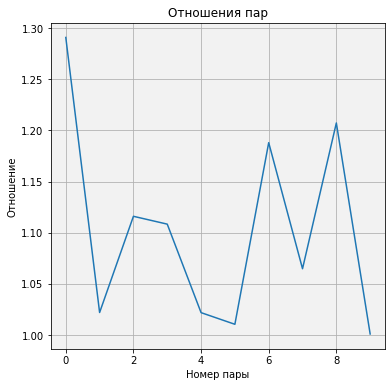

In [12]:
ratio=[i[1]/i[0] for i in df.to_numpy()]
drawPlot(ratio,title="Отношения пар",x="Номер пары",y="Отношение")

На данном графике мы видим по оси Х номер пары, а на оси У отношение большего числа в паре к меньшему.
Это своего рода расстояние от 1 до другого числа.  
То, есть 220 умножить на 1.29, мы получим 284. Нет смысла искать пару этому числу, если умножать больше чем на 1.29  

У другого числа расстояние до его пары вообще близкое.   
В целом среднее соотношение пар

In [13]:
np.mean(ratio)

1.1030557457540984

Кстати, раз уж мы заговорили про соотношения, попробуем составить числовую последовательность из дружественных чисел  
А затем найдём соотношения чисел к предыдущим в таком ряду.

In [14]:
seq=df.to_numpy().flatten()
seq #Собственно первые 20 чисел последовательности (10 пар)

array([  220,   284,  1184,  1210,  2620,  2924,  5020,  5564,  6232,
        6368, 10744, 10856, 12285, 14595, 17296, 18416, 63020, 76084,
       66928, 66992])

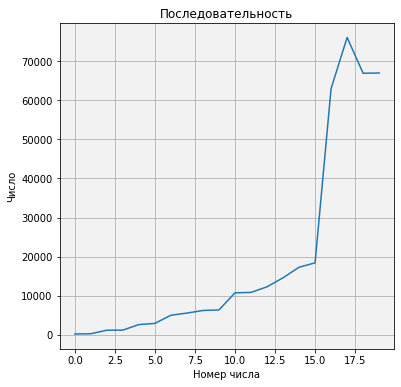

In [15]:
drawPlot(seq,title="Последовательность",x="Номер числа",y="Число")

Для начала я показал график, где мы видим как изменяется число со временем во всей последовательности.

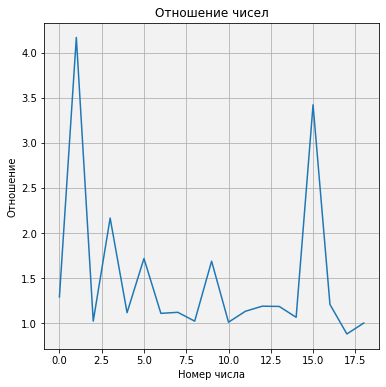

In [16]:
ratio = [seq[i]/seq[i-1] for i in range(1,len(seq))]
drawPlot(ratio,title="Отношение чисел",x="Номер числа",y="Отношение")

Вот пожалуйста, мы видим, что отношения чисел во всей последовательности отличаются от отношений чисел внутри пар!

Найдём производную графика. Да, ряд не сходится, но мы можем узнать скорость изменения отношений. 

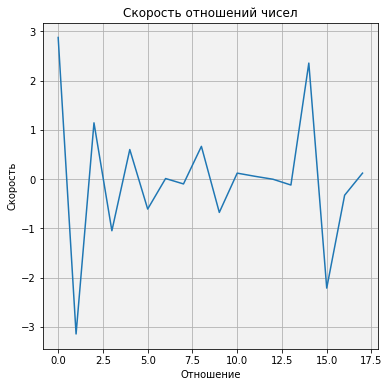

In [17]:
dratio = [ratio[i]-ratio[i-1] for i in range(1,len(ratio))]
drawPlot(dratio,title="Скорость отношений чисел",x="Отношение",y="Скорость")

А ускорение?)

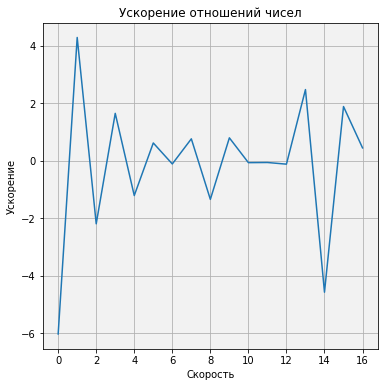

In [18]:
ddratio = [dratio[i]-dratio[i-1] for i in range(1,len(dratio))]
drawPlot(ddratio,title="Ускорение отношений чисел",x="Скорость",y="Ускорение")

В целом не изменилось особо. Ах..мы это исследовали графики соотношений чисел!  
Сделаем тоже самое с самой последовательностью.   
Так мы узнаем, похожи ли графики.  
  
Кстати, скорость ряда -    
Другими словами это будет расстояние в единицах от 1 элемента ряда до другого.

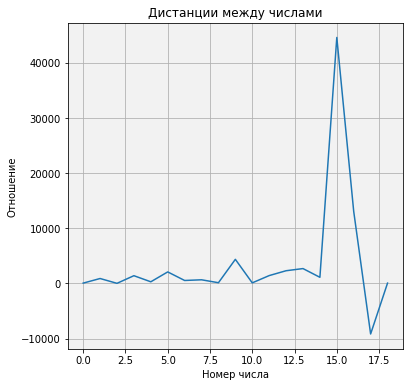

In [19]:
dseq = [seq[i]-seq[i-1] for i in range(1,len(seq))]
drawPlot(dseq,title="Дистанции между числами",x="Номер числа",y="Отношение")

Ого, скорость вроде нарастает, но что же интересно со следующими парами в дружественных числах?  
Узнаем ускорение

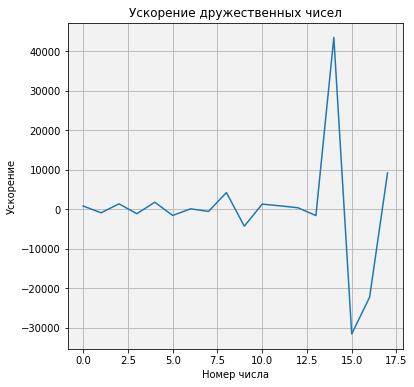

In [20]:
ddseq = [dseq[i]-dseq[i-1] for i in range(1,len(dseq))]
drawPlot(ddseq,title="Ускорение дружественных чисел",x="Номер числа",y="Ускорение")

Графики скорости и ускорения чисел не похожи на то же у их соотношений, но мы замечаем другое!  
Не зная все следующие пары чисел после 11, мы можем предполагать, что скорость и ускорение начинают увеличиваться.  

В принципе неудивительно.   
Если мы вспомним график самого ряда, то заметим, что числа очень сильно увеличиваются со временем.

#### Плотность   
Если вы читали предыдущую мою статью про числа Фибоначчи, то вы уже знаете про плотность последовательности.  

Предлагаю исследовать и ряд дружественных чисел на это свойство! +Скорость изменения плотности!)

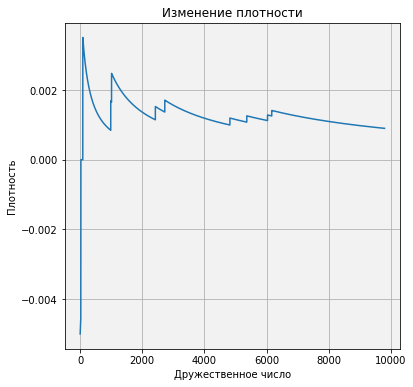

In [21]:
densities=[(len(list(filter(lambda x: x < i, sorted(seq))))-1)/i for i in range(200,10000)]
drawPlot(densities,"Изменение плотности","Плотность","Дружественное число")

Ого! Неожиданно. Плотность вроде увеличивается, а потом уменьшается.  
Причём, у вас, дорогие читатели, есть возможность поучаствовать в моём исследовании.   
Сможете вычислить тангенс угла между проекциями на оХ скачков и осью оХ ?

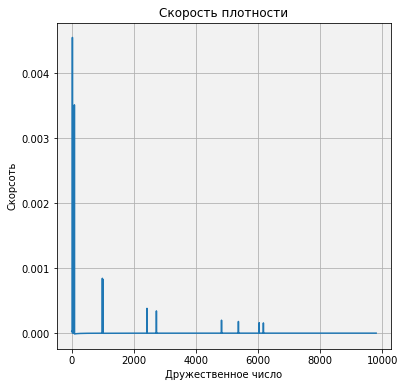

In [22]:
ddensities = [densities[i]-densities[i-1] for i in range(1,len(densities))]
drawPlot(ddensities,title="Скорость плотности",x="Дружественное число",y="Скорсоть")

Ну, значит в целом стремится к нулю, что неудивительно. Ведь числа значительно увеличиваются со временем, а также значительно увеличивается их дистанция от одной пары до другой.

## Алгоритмы

Ну хорошо, а можно ли придумать другой алгоритм нахождения дружественных чисел?  
Конечно да   

Я даже предлагаю использовать библиотеку **sympy**. Взять функцию от туда и сравнить по скорости обе.   

Единственный недостаток. У библиотеки есть функция не нахождение дружественных чисел, а их проверка! Поэтому, самостоятельно создадим двухмерную итерацию.

In [23]:
from sympy.ntheory.factor_ import is_amicable

for i in range(1,1000):
    for j in range(1,1000):
        if(is_amicable(i, j)):
            print(i,j)

220 284
284 220


Попробуйте воссоздать это на с++  

Ведь на Python, циклы работают медленно, поэтому даже замерить в сравнении будет тяжело. Не думаю, что числа получатся годными для сравнения, но попробуем.

In [24]:
%time is_amicable(1184,1210)

CPU times: user 824 µs, sys: 0 ns, total: 824 µs
Wall time: 832 µs


True

In [25]:
%time AmicableNumber(1184)

1184 -> 1210
CPU times: user 11.7 ms, sys: 11 µs, total: 11.7 ms
Wall time: 11.2 ms


Так, мы видим, что нахождение пары для ЧИСЛА намного дольше, чем проверка уже готовой пары.   
Однако при переборе пар чисел при проверках уходит намного больше времени!

## Другие способы построения ряда

Так или иначе, если хорошо поинтересоваться данной темой, можно найти ещё два способа построения последовательности дружественных чисел.   

Представляю вашему вниманию: "Формула Сабита ибн Курра" и "Метод Вальтера Боро"

Начну с первого.

Если для натурального числа n>1 все три числа p,q,r простые, то будет пара дружественных чисел по формуле: (2^{n} * pq, 2^{n} * r),  
где:  
p = (3 * 2^{n-1}) - 1  
q = (3 * 2^n) - 1  
r = (9 * 2^{2*n-1})-1

In [26]:
def _isPrime(n):
    if n%2==0:
        return n==2
    d=3
    while d*d<=n and n%d!=0:
        d+=2
    return d*d>n   

In [27]:
def Formula_Sabita_ibn_Kurra(n):    
    p = (3 * 2**(n-1)) - 1
    q = (3 * 2**n) - 1
    r = (9 * 2**(2*n-1))-1
    
    if(_isPrime(p) and _isPrime(q) and _isPrime(r)):
        return ( 2**n * p * q, 2**n * r )

In [28]:
Formula_Sabita_ibn_Kurra(2) # Нашло!

(220, 284)

Эта формула даёт пары (220, 284), (17 296, 18 416) и (9 363 584, 9 437 056) соответственно для n=2,4,7 ,
но больше никаких пар дружественных чисел, которые могли бы быть получены по этой формуле для n < 20000 не существует.  

Кроме того, многие пары дружественных чисел, например, (6232, 6368), не могут быть получены по этой формуле.  

Так, что эта формула вышла именно для целей Занимательной Математики 😀  

---  

Так, а что по Методу Вальтера ?

Если для пары дружественных чисел вида A=a*u и B=a*s числа s и p=u+s+1 являются простыми, причём a не делится на p, то при всех тех натуральных n, при которых оба числа q_{1}=(u+1)p^{{n+1}}-1 и q_{2}=(u+1)(s+1)p^{n}-1 просты, числа  
B_{1}=Ap^{n}q_{1} и B_{2}=ap^{n}q_{2} — дружественные.  

Сложно? Понимаю. Сам долго пытался понять алгоритм

In [29]:
def Walter_Borough(n,A=220,a=4,u=55,s=71):
    p = s+u+1
    q1 = (u+1)*p**n - 1
    if(_isPrime(q1)):
        q2 = (u+1)*(s+1)*p**n - 1
        if(_isPrime(q2)):   
            return ( A*p**n *q1, a*p**n *q2 )

In [30]:
Walter_Borough(2)

(3204978428740, 4195612705532)

Но и тут найти весь ряд не выйдет. То есть можно лишь найти огромные числа!  
Попробуем, но это будут лоскутики от всей последовательности дружественных чисел

In [31]:
for i in range(1,50):
    if(Walter_Borough(i)):
        print(i,end=",")

2,

Решил проверить первые 50 чисел по Вальтеру, но в итоге ушло 26 секунд...так ещё и найдена была только одна пара :)

Почему так долго? В принципе, давайте спроектируем график скорости, чтобы разобраться

In [32]:
#Создаём массив, в котором будем хранить тайминги
s = np.array([])

#Сделаем итерации такие, что будем подавать на вход индексы от 1 до 50
for i in range(1,50):
    
    #Включаем "таймер"
    start_time = time.time()
    
    Walter_Borough(i)
    
    #Стоп таймер (время зафиксируется как только закончится выполнения рекурсии)
    end_time = (time.time() - start_time)
    s=np.append(s,end_time)
    #print("--- %s seconds ---" % end_time)

(3204978428740, 4195612705532)

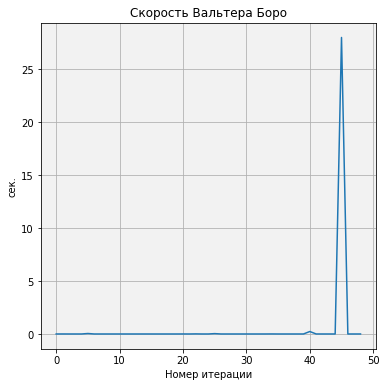

In [33]:
drawPlot(s,title="Скорость Вальтера Боро",x="Номер итерации",y="сек.")

Дело в том, что мы каждый раз проверяем число на простоту, а это в свою очередь разбор числа на делимости.  
Поэтому, как попадётся огромное простое число уходит много времени на обработку!


---  

В целом, я готов предоставить первые дружественные 42 пары (84 числа):

220,284,1184,1210,2620,2924,5020,5564,6232,6368,10744,10856,12285,14595,17296,18416,63020,76084,66928,66992,67095,71145,69615,87633,79750,88730,100485,124155,122265,139815,122368,123152,141664,153176,142310,168730,171856,176336,176272,180848,185368,203432,196724,202444,280540,365084,308620,389924,319550,430402,356408,399592,437456,455344,469028,486178,503056,514736,522405,525915,600392,669688,609928,686072,624184,691256,635624,712216,643336,652664,667964,783556,726104,796696,802725,863835,879712,901424,898216,980984,947835,1125765,998104,1043096

In [34]:
seq=[220,284,1184,1210,2620,2924,5020,5564,6232,6368,10744,10856,12285,14595,17296,18416,63020,76084,66928,66992,67095,71145,69615,87633,79750,88730,100485,124155,122265,139815,122368,123152,141664,153176,142310,168730,171856,176336,176272,180848,185368,203432,196724,202444,280540,365084,308620,389924,319550,430402,356408,399592,437456,455344,469028,486178,503056,514736,522405,525915,600392,669688,609928,686072,624184,691256,635624,712216,643336,652664,667964,783556,726104,796696,802725,863835,879712,901424,898216,980984,947835,1125765,998104,1043096]

### Статистика

Узнаем сколько чётных и нечётных чисел в последовательности?  
Это также покажет, сколько чётных и нечётных пар!

In [35]:
InteractiveShell.ast_node_interactivity = "last"

EvenAmicable=[i for i in seq if(i%2==0)]
len(EvenAmicable)

68

''

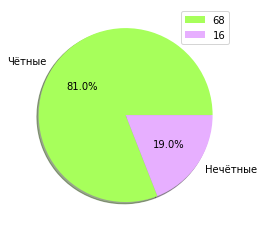

In [36]:
plt.pie([len(EvenAmicable),84-len(EvenAmicable)], 
        colors=["#A7FF5B","#E7AFFF"],
        labels=["Чётные","Нечётные"], 
        autopct='%1.1f%%',
        shadow=True,
        textprops={'color':"black"})
plt.legend([len(EvenAmicable),84-len(EvenAmicable)])
;

То есть 68 чисел из 84 - чётные.  
И 32 пары из 42 - чётные.

Исследуем теперь на простоту!

''

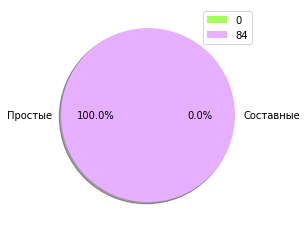

In [37]:
PrimeAmicable=[i for i in seq if(_isPrime(i))]
plt.pie([len(PrimeAmicable),84-len(PrimeAmicable)], 
        colors=["#A7FF5B","#E7AFFF"],
        labels=["Составные","Простые"], 
        autopct='%1.1f%%',
        shadow=True,
        textprops={'color':"black"})
plt.legend([len(PrimeAmicable),84-len(PrimeAmicable)])
;

ШОК Контент! В первых 84 числах ни одно не является простым!

### Фракталы

В завершение моего доклада по дружественным числам, я бы хотел поиграться с самой интересной частью.  
Рисование фракталов.  

Хотя в текущем случае выйдет, что мы будем просто рисовать спирали согласну тому или иному углу последовательности

In [38]:
ratio=[seq[i]/seq[i-1] for i in range(1,len(seq))]

В общем, я нашёл отношения чисел в первых 42 дружественных парах.  
Попробуем нарисовать два рисунка. Первый будет рисовать по среднему значению, а второй по мере перечисления списка отношений.  

Но вы можете спросить. Как знать насколько поворачивать в спирали? Угол просчитать очень просто.  
Мы берём число x. И узнаём угол по формуле angle=2pi/x^2

$ угол={{2 \pi }\over{x^2}} $

In [39]:
np.mean(ratio)

1.1533085895428854

Таким образом, мы знаем среднее отношение дружественных чисел в первых 42 парах.  
Значит угол равен:

In [40]:
angle=sp.N(360/np.mean(ratio)**2)
angle

270.652128987702

In [41]:
#Создаём картинку 300х300

N=300
t = turtle.Turtle(fixed=False, width=N, height=N)
t.hideturtle()
t

Turtle()

In [42]:
for i in range(15):
    for j in range(int(angle)): 
        t.forward(i/10) 
        t.left(1)
        if(i>10):
            time.sleep(0.01) # Чтобы не терять рисунок

Получилось что-то примерно типа розочки )))  
  
А теперь посмотрим на динамический угол!

In [43]:
t = turtle.Turtle(fixed=False, width=N, height=N)
t.hideturtle()
t

Turtle()

In [44]:
for i in range(15):
    angle=sp.N(360/ratio[i]**2)
    for j in range(int(angle)): 
        t.forward(i/10) 
        t.left(1)
        if(i>10):
            time.sleep(0.04) # Чтобы не терять рисунок

В целом криво получается при динамике, но уже более менее красивый рисунок при среднем значении отношений дружественных чисел.   
Хотя мы представляем эти пары как друзей, так или иначе в древности они вызывали ассоциацию и с любовной парой. Поэтому, забавно, что рисунок спирали похож на розу. (Мне так кажется)

### Подведём итог

Если говорить об открытых проблемах в математике дружественных чисел:  

Неизвестно, конечно или бесконечно количество пар дружественных чисел. На апрель 2016 года известно более 1 000 000 000 пар дружественных чисел. Все они состоят из чисел одинаковой чётности.  

Неизвестно, существует ли чётно-нечётная пара дружественных чисел.  

Также неизвестно, существуют ли взаимно простые дружественные числа, но если такая пара дружественных чисел существует, то их произведение должно быть больше 1067.

# Конец  

На этом всё, дорогие читатели!  
Надеюсь вам было интересно узнать что-то вроде такого из занимательной математики 😍

Ожидайте следующей статьи, в которой будет исследование компанейских чисел.
Если у вас есть мысли или пожелания, обязательно напишите...Может найду что подправить или добавить.

---

Здесь ссылка на датасеты дружественных чисел
[Дружественные числа](https://github.com/lonagi/pysasha/tree/master/datasets/Number%20Theory/Amicable%20Numbers)  

Датасет хранит 42 пары, а так есть отдельные, для последовательности из 84 чисел.

Если есть желание прочитать статью на другом источнике, то пожалуйста, вот ниже ссылки:
    
[ВКонтакте](vk.com/@lonagi-druzhestvennye-chisla-issledovanie)  
[Instagram](https://vk.com/lonagi)    
[Facebook](https://www.facebook.com/%D0%97%D0%B0%D0%BD%D0%B8%D0%BC%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F-%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0-%D0%BE%D1%82-Lonagi-112410007105730)    
[Github](https://github.com/lonagi/pysasha/blob/master/docs/Number%20Theory/Amicable%20Numbers/AmicableNumbers.md)  